In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches


In [2]:
filename = '../extradata/tweetsPerDay.csv'
with open(filename) as f:
    content = f.readlines()
    content = [x.strip() for x in content] 

name = []
follower = []
for line in content:
    name.append(line.split(',')[0])
    follower.append(float(line.split(',')[1]))

In [3]:
junk = ['medialne','CrowdMedia_PL','dlapolski','Matka_Kurka','MediaNarodoweMN','niezaleznapl','PikioPL','RepublikaTV','wPrawopl','wSensie']
mainstream = ['wgospodarce','KRESYPL','bankier_pl','WiadomosciTVP','FaktyTVN','rzeczpospolita','OnetWiadomosci','Interia_Fakty','RadioZET_NEWS','natematpl']
bigmainstream = ['tvp_info','tvn24','gazeta_wyborcza','gazetapl_news']
factcheck = ['DemagogPL','konkret24','oko_press','demaskator24','AntyFakePL']
val_map = {}
color_map = []
pattern_map = []
# {'orange': 'x', 'lightblue': '//','DodgerBlue': '/', 'greenyellow': '+',}

for node in name:
    if node in junk:
        color_map.append('orange')
        pattern_map.append('x')
    elif node in mainstream:
        color_map.append('lightblue')
        pattern_map.append('/')
    elif node in bigmainstream:
        color_map.append('DodgerBlue')
        pattern_map.append('//')
    elif node in factcheck:
        color_map.append('greenyellow')
        pattern_map.append('+')
    else:
        color_map.append('lightgray')

[135.6, 123.7, 99.8, 95.3, 81.9, 80.6, 52.3, 47.1, 42.1, 30.3, 30.0, 29.0, 28.8, 21.3, 16.6, 16.3, 13.1, 12.2, 10.1]
range(0, 19)


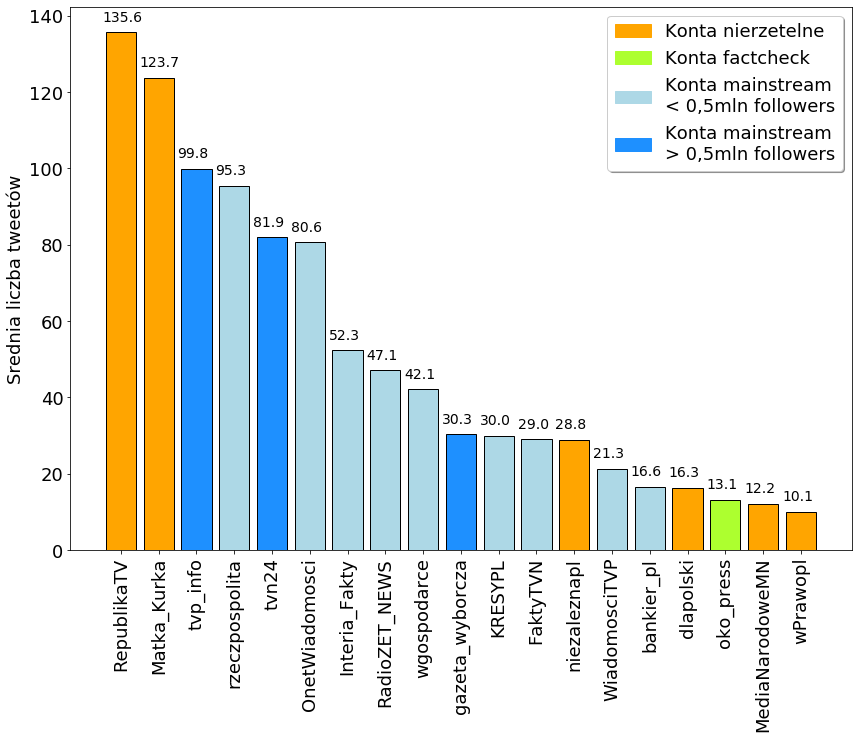

In [5]:
plt.rcParams.update({'font.size': 18})
plt.figure(figsize =(14, 10)) 

# Make a fake dataset
height = follower
bars = name
print(height)
y_pos = range(len(bars))
print(y_pos)


# Create bars
plt.xticks(rotation=90)
plt.bar(y_pos, height, color= color_map, edgecolor='black')

# Create names on the x-axis
plt.xticks(y_pos, bars)

for i in y_pos:
    plt.text(x = y_pos[i]-0.5 , y = height[i]+3, s = height[i], size = 14)
#     plt.bar(y_pos[i], height[i], color= color_map[i], edgecolor='black', hatch = pattern_map[i])

plt.ylabel('Srednia liczba tweetów')

junk_patch = mpatches.Patch(color='orange', label='Konta nierzetelne')
mainstream_patch = mpatches.Patch(color='lightblue', label='Konta mainstream\n< 0,5mln followers')
bigmainstream_patch = mpatches.Patch(color='DodgerBlue', label='Konta mainstream\n> 0,5mln followers')
factcheck_patch = mpatches.Patch(color='greenyellow', label='Konta factcheck')
plt.legend(handles=[junk_patch,  factcheck_patch, mainstream_patch, bigmainstream_patch,],
           fontsize=18,loc='upper right',
          fancybox=True, shadow=True, ncol=1)


# Show graphic
plt.show()

